<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,0.134782,214.621521,214.477932,0.143589
1,0.0,1.0,88.215495,94.604408,36.752253,0.042328,229.614484,229.552057,0.062427
2,0.0,2.0,75.723322,35.232029,46.417423,-0.207032,167.165742,167.387419,-0.221678
3,0.0,3.0,38.055184,66.641168,96.212257,-0.481988,210.426621,210.913184,-0.486563
4,0.0,4.0,68.821230,68.543753,46.272811,-0.276782,193.361013,193.639067,-0.278053
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-0.327613,178.429826,178.789562,-0.359736
249996,999.0,246.0,32.379447,24.201317,94.176224,-0.182911,160.574077,160.715051,-0.140974
249997,999.0,247.0,73.636953,77.707721,80.827540,0.199599,242.371812,242.138647,0.233166
249998,999.0,248.0,96.730468,97.527144,33.411083,0.241300,237.909995,237.685205,0.224790


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    57.585513  99.226585  47.674641  0.134782  214.621521   
      1.0    88.215495  94.604408  36.752253  0.042328  229.614484   
      2.0    75.723322  35.232029  46.417423 -0.207032  167.165742   
      3.0    38.055184  66.641168  96.212257 -0.481988  210.426621   
      4.0    68.821230  68.543753  46.272811 -0.276782  193.361013   
...                ...        ...        ...       ...         ...   
999.0 245.0  82.142416  53.368686  33.246337 -0.327613  178.429826   
      246.0  32.379447  24.201317  94.176224 -0.182911  160.574077   
      247.0  73.636953  77.707721  80.827540  0.199599  242.371812   
      248.0  96.730468  97.527144  33.411083  0.241300  237.909995   
      249.0  92.431783  65.077315  73.380665  0.072511  240.962273   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.477932  0.143589  
      1.0    229.552057  0.062427  
      2.0    167.387419 -0.221678  
      3.0    210.913184 -0.486563  
      4.0    193.639067 -0.278053  
...                 ...       ...  
999.0 245.0  178.789562 -0.359736  
      246.0  160.715051 -0.140974  
      247.0  242.138647  0.233166  
      248.0  237.685205  0.224790  
      249.0  240.881448  0.080825  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    57.585513  99.226585  47.674641  0.134782  214.621521   
      1.0    88.215495  94.604408  36.752253  0.042328  229.614484   
      2.0    75.723322  35.232029  46.417423 -0.207032  167.165742   
      3.0    38.055184  66.641168  96.212257 -0.481988  210.426621   
      4.0    68.821230  68.543753  46.272811 -0.276782  193.361013   
...                ...        ...        ...       ...         ...   
999.0 245.0  82.142416  53.368686  33.246337 -0.327613  178.429826   
      246.0  32.379447  24.201317  94.176224 -0.182911  160.574077   
      247.0  73.636953  77.707721  80.827540  0.199599  242.371812   
      248.0  96.730468  97.527144  33.411083  0.241300  237.909995   
      249.0  92.431783  65.077315  73.380665  0.072511  240.962273   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.477932  0.143589  
      1.0    229.552057  0.062427  
      2.0    167.387419 -0.221678  
      3.0    210.913184 -0.486563  
      4.0    193.639067 -0.278053  
...                 ...       ...  
999.0 245.0  178.789562 -0.359736  
      246.0  160.715051 -0.140974  
      247.0  242.138647  0.233166  
      248.0  237.685205  0.224790  
      249.0  240.881448  0.080825  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,0.134782,214.621521,214.477932,0.143589
1,0.0,1.0,88.215495,94.604408,36.752253,0.042328,229.614484,229.552057,0.062427
2,0.0,2.0,75.723322,35.232029,46.417423,-0.207032,167.165742,167.387419,-0.221678
3,0.0,3.0,38.055184,66.641168,96.212257,-0.481988,210.426621,210.913184,-0.486563
4,0.0,4.0,68.821230,68.543753,46.272811,-0.276782,193.361013,193.639067,-0.278053
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-0.327613,178.429826,178.789562,-0.359736
249996,999.0,246.0,32.379447,24.201317,94.176224,-0.182911,160.574077,160.715051,-0.140974
249997,999.0,247.0,73.636953,77.707721,80.827540,0.199599,242.371812,242.138647,0.233166
249998,999.0,248.0,96.730468,97.527144,33.411083,0.241300,237.909995,237.685205,0.224790


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    57.585513  99.226585  47.674641  0.134782  214.621521   
      1.0    88.215495  94.604408  36.752253  0.042328  229.614484   
      2.0    75.723322  35.232029  46.417423 -0.207032  167.165742   
      3.0    38.055184  66.641168  96.212257 -0.481988  210.426621   
      4.0    68.821230  68.543753  46.272811 -0.276782  193.361013   
...                ...        ...        ...       ...         ...   
999.0 245.0  82.142416  53.368686  33.246337 -0.327613  178.429826   
      246.0  32.379447  24.201317  94.176224 -0.182911  160.574077   
      247.0  73.636953  77.707721  80.827540  0.199599  242.371812   
      248.0  96.730468  97.527144  33.411083  0.241300  237.909995   
      249.0  92.431783  65.077315  73.380665  0.072511  240.962273   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.477932  0.143589  
      1.0    229.552057  0.062427  
      2.0    167.387419 -0.221678  
      3.0    210.913184 -0.486563  
      4.0    193.639067 -0.278053  
...                 ...       ...  
999.0 245.0  178.789562 -0.359736  
      246.0  160.715051 -0.140974  
      247.0  242.138647  0.233166  
      248.0  237.685205  0.224790  
      249.0  240.881448  0.080825  

[250000 rows x 7 columns]

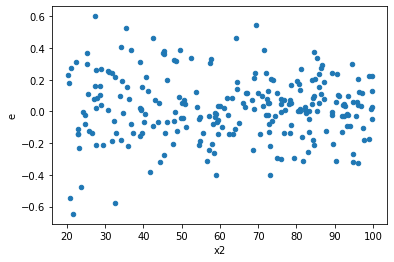

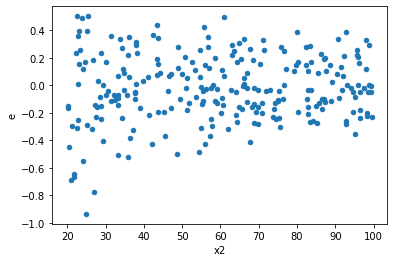

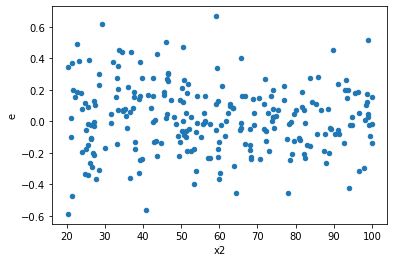

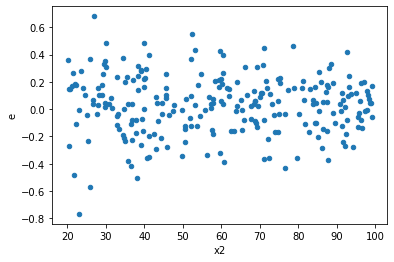

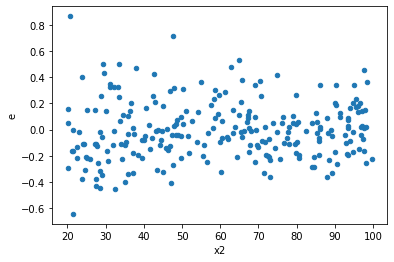

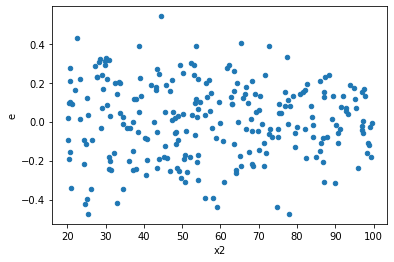

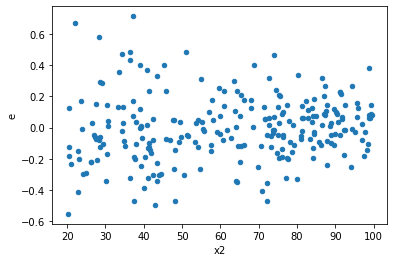

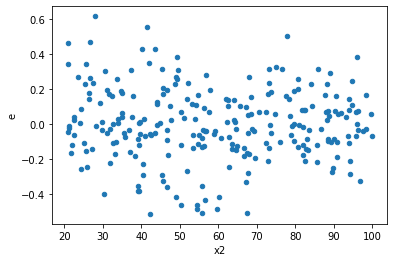

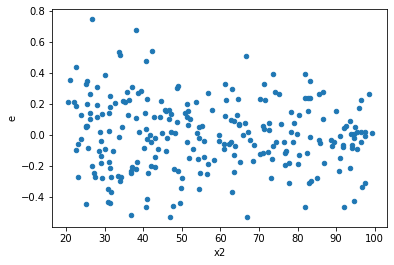

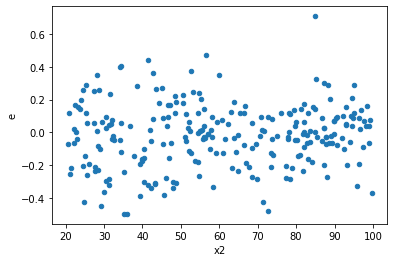

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,123.0,121.0,4.36338239575693,5.811138863741029,0.03547465362404008,0.04802594102265313,1.3538100056347677,0.09588952484831959,0.9520552375758402,0.04794476242415979,Reject005=1 : Homoscedasticity
1.0,119.0,125.0,3.7251452831587444,6.251384122274877,0.031303741875283564,0.05001107297819902,1.5976068668546672,0.009993081437190687,0.9950034592814047,0.004996540718595344,Reject005=0 : Heteroscedasticity
2.0,124.0,120.0,4.013398090532213,5.646529114303803,0.0323661136333243,0.047054409285865025,1.4538170945991362,0.04007145218621688,0.9799642739068916,0.02003572609310844,Reject005=0 : Heteroscedasticity
3.0,110.0,134.0,4.377351333176935,6.538502325422278,0.03979410302888123,0.04879479347330058,1.2261815133233924,0.2597043129227785,0.8701478435386107,0.12985215646138926,Reject005=1 : Homoscedasticity
4.0,105.0,139.0,3.9751295351574782,7.111106994436836,0.037858376525309316,0.051159043125444864,1.3513269141703343,0.0968849408176975,0.9515575295911513,0.04844247040884875,Reject005=1 : Homoscedasticity
8.0,143.0,101.0,5.859802602844336,5.222377721799302,0.04097764057933102,0.051706710116824775,1.2618274108955276,0.2141239928084806,0.8929380035957597,0.1070619964042403,Reject005=1 : Homoscedasticity
11.0,147.0,97.0,7.9783996280862715,6.551126691115497,0.054274827401947424,0.067537388568201,1.2443593430161273,0.24734905625973957,0.8763254718701302,0.12367452812986979,Reject005=1 : Homoscedasticity
12.0,113.0,131.0,4.952542882952855,6.304413059608775,0.04382781312347659,0.048125290531364696,1.0980536582051397,0.6036974671230466,0.6981512664384767,0.3018487335615233,Reject005=1 : Homoscedasticity
16.0,132.0,112.0,5.028149207930954,5.376644762094839,0.03809203945402238,0.04800575680441821,1.260256932747374,0.20759099515801327,0.8962045024209934,0.10379549757900663,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,123.0,121.0,4.36338239575693,5.811138863741029,0.03547465362404008,0.04802594102265313,1.3538100056347677,0.09588952484831959,Reject005=1 : Homoscedasticity
1.0,119.0,125.0,3.7251452831587444,6.251384122274877,0.031303741875283564,0.05001107297819902,1.5976068668546672,0.009993081437190687,Reject005=0 : Heteroscedasticity
2.0,124.0,120.0,4.013398090532213,5.646529114303803,0.0323661136333243,0.047054409285865025,1.4538170945991362,0.04007145218621688,Reject005=0 : Heteroscedasticity
3.0,110.0,134.0,4.377351333176935,6.538502325422278,0.03979410302888123,0.04879479347330058,1.2261815133233924,0.2597043129227785,Reject005=1 : Homoscedasticity
4.0,105.0,139.0,3.9751295351574782,7.111106994436836,0.037858376525309316,0.051159043125444864,1.3513269141703343,0.0968849408176975,Reject005=1 : Homoscedasticity
5.0,141.0,103.0,7.224965488488907,2.548563455652547,0.05124088998928303,0.024743334520898514,0.4828826065681832,6.215669732130975e-05,Reject005=0 : Heteroscedasticity
6.0,117.0,127.0,5.951470917707394,5.208823320571743,0.0508672728009179,0.041014356854895614,0.8063014704054571,0.23790582864091486,Reject005=1 : Homoscedasticity
7.0,122.0,122.0,6.2400349758274976,5.282091349712001,0.05114782767071719,0.04329583073534427,0.8464842537219173,0.3586102532161348,Reject005=1 : Homoscedasticity
8.0,143.0,101.0,5.859802602844336,5.222377721799302,0.04097764057933102,0.051706710116824775,1.2618274108955276,0.2141239928084806,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      548
Reject005=0 : Heteroscedasticity    452
Name: Result_test, dtype: int64